In [1]:
# import necassary libalries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import necassary libalries for ML
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets

In [2]:
sns.set_theme()

In [3]:
path = "C:\\Users\\pinch\\Desktop\\Python\\Python Project\\churn.csv"

# Step 1: looking and clining the data

In [4]:
churn = pd.read_csv('churn.csv')
churn.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [5]:
churn.shape

(7043, 21)

In [6]:
# Change columns to lowercase letters
churn = churn.rename(columns=str.lower)
churn

customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     phoneservice     multiplelines internetservice onlinesecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     deviceprotection techsupport streamingtv streamingmovies        contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     paperlessbilling              paymentmethod monthlycharges  totalcharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [7]:
churn.describe()

seniorcitizen       tenure  monthlycharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
# We can see that 'Total Chrages' is an object type, and we need to change him to numeric type.
# why? because his values on df appears as float, so lets do this.
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'],errors = 'coerce')

In [10]:
# We can se that we have 11 null values in 'total charges' column, we need to decide what to do with that
churn.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [11]:
churn.isnull().mean()

customerid          0.000000
gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
tenure              0.000000
phoneservice        0.000000
multiplelines       0.000000
internetservice     0.000000
onlinesecurity      0.000000
onlinebackup        0.000000
deviceprotection    0.000000
techsupport         0.000000
streamingtv         0.000000
streamingmovies     0.000000
contract            0.000000
paperlessbilling    0.000000
paymentmethod       0.000000
monthlycharges      0.000000
totalcharges        0.001562
churn               0.000000
dtype: float64

In [12]:
# Show the rows with null values
churn.loc[churn.totalcharges.isnull()]

customerid  gender  seniorcitizen partner dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     phoneservice     multiplelines internetservice       onlinesecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         deviceprotection          techsupport          streamingtv  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          streamingmovies  contract paperlessbilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  paymentmethod monthlycharges  totalcharges  churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [13]:
# lets call the 11 null values in 'totalcharges' column as '0'
churn.loc[churn.totalcharges.isnull(), 'totalcharges'] = 0
churn.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
# Now we dont have null values, lets see the values we changed
churn.loc[(churn['totalcharges']) == 0] 

customerid  gender  seniorcitizen partner dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     phoneservice     multiplelines internetservice       onlinesecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         deviceprotection          techsupport          streamingtv  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          streamingmovies  contract paperlessbilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  paymentmethod monthlycharges  totalcharges  churn  
488   Bank transfer (automatic)          52.55           0.0     No  
753                Mailed check          20.25           0.0     No  
936                Mailed check          80.85           0.0     No  
1082               Mailed check          25.75           0.0     No  
1340    Credit card (automatic)          56.05           0.0     No  
3331               Mailed check          19.85           0.0     No  
3826               Mailed check          25.35           0.0     No  
4380               Mailed check          20.00           0.0     No  
5218               Mailed check     

In [15]:
# now lets see the datatype of this column again
churn['totalcharges'].dtype

dtype('float64')

### Now we'll check the values in different column, and then clean the unneccesarry/wrong data

In [16]:
churn.replace('No internet service', 'No', inplace=True)

In [17]:
churn['multiplelines'] = churn['multiplelines'].str.replace('No phone service','No')
churn['multiplelines'].value_counts()

No     4072
Yes    2971
Name: multiplelines, dtype: int64

<br>
<br>
<hr class="dotted">
<br>
<br>

# Step 2: EDA

In [18]:
churn

customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     phoneservice multiplelines internetservice onlinesecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7038          Yes           Yes             DSL            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7040           No            No             DSL            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     deviceprotection techsupport streamingtv streamingmovies        contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     paperlessbilling              paymentmethod monthlycharges  totalcharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [19]:
data = churn

In [20]:
# What is the label distibution
def plot_pie(churn):
  labels = ["No", "Yes"]
  values = churn["churn"].value_counts().to_list()

  colors = ['gold', 'royalblue']

  # Pie plot
  fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
  fig.update_traces(hoverinfo="label+value+text+percent", textfont_size=20, textinfo="value",
                  marker=dict(colors=colors, line=dict(color="white", width=2)))
  fig.update_layout(dict(title="Customer Churn"))
  fig.show()

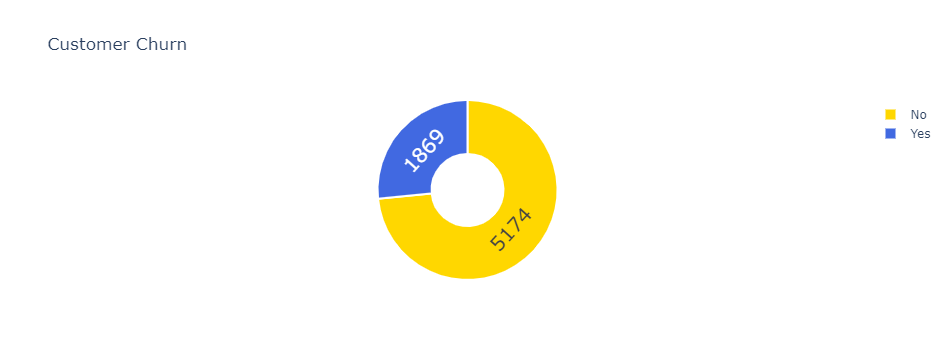

In [21]:
plot_pie(churn)

##### It's look like almost 27% left the company so far

In [22]:
# Now we want to look on our label feature
churn['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [23]:
# Lets change the label feature to '0' and '1'
churn.loc[churn.churn == 'No', 'churn'] = 0
churn.loc[churn.churn == 'Yes', 'churn'] = 1

In [24]:
# then change it to numeric
churn['churn'] = pd.to_numeric(churn['churn'],errors = 'coerce')

In [25]:
# Now we check some statistic facts about 'totalcharges' column
churn['totalcharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

Text(0, 0.5, 'Frequency')

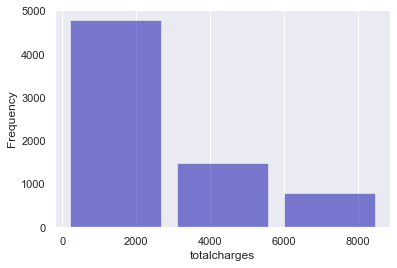

In [26]:
# lets plot this
plt.hist(x=churn['totalcharges'].dropna(), bins=3, color='#0504aa',alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('totalcharges')
plt.ylabel('Frequency')

#####  From this it can be concluded that most customers paid less then 3000 NIS <br>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


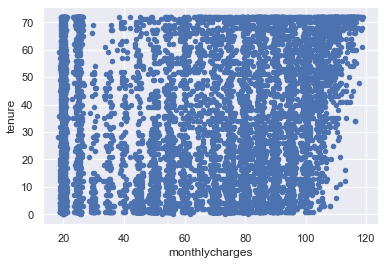

In [27]:
churn.plot(kind='scatter',x='monthlycharges',y='tenure')
plt.show()

##### We can see here that most of the customer monthly charge is above 40 NIS, there are no exceptional charges

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


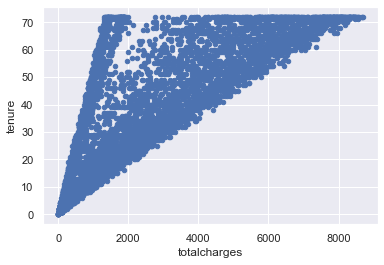

In [28]:
churn.plot(kind='scatter',x='totalcharges',y='tenure')
plt.show()

In [29]:
churn['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

##### We can see that there are no exceptional charges in relation to the customer time in the company

In [30]:
churn['customertype'] = None

In [31]:
# lets group monthlycharges column
churn.loc[(churn['monthlycharges'] <= 40),'customertype'] = 'small'
churn.loc[(churn['monthlycharges'] > 40.) &(churn['monthlycharges'] <= 80),'customertype'] = 'regular'
churn.loc[(churn['monthlycharges'] >80.), 'customertype'] = 'vip'

In [32]:
churn['customertype'].describe()

count     7043
unique       3
top        vip
freq      2666
Name: customertype, dtype: object

In [33]:
churn.groupby('customertype').agg({'churn':['count','sum','mean']})

churn               
             count  sum      mean
customertype                     
regular       2539  749  0.294998
small         1838  214  0.116431
vip           2666  906  0.339835

In [34]:
churn['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

##### We understand that our customer seniority is between 0-6 years

In [35]:
# We want to create seniority column (in years)
churn['seniority'] = None

In [36]:
# lets group tenure column
churn.loc[(churn['tenure'] < 12),'seniority'] = '0-1 year'
churn.loc[(churn['tenure'] >= 12.) &(churn['tenure'] < 36),'seniority'] = '1-3 years'
churn.loc[(churn['tenure'] >=36.) & (churn['tenure'] < 60.),'seniority'] = '3-5 years'
churn.loc[(churn['tenure'] >=60.), 'seniority'] = '5-6 years'

In [37]:
churn['seniority'].describe()

count         7043
unique           4
top       0-1 year
freq          2069
Name: seniority, dtype: object

In [38]:
churn.groupby('seniority').agg({'churn':['count','sum','mean']})

churn               
          count  sum      mean
seniority                     
0-1 year   2069  999  0.482842
1-3 years  1923  502  0.261050
3-5 years  1568  269  0.171556
5-6 years  1483   99  0.066757

<AxesSubplot:xlabel='seniority'>

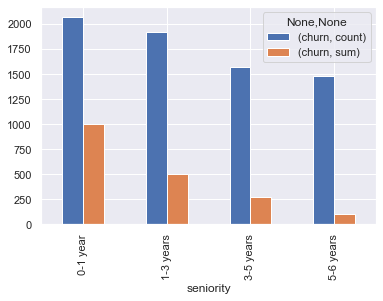

In [39]:
# lets plot this to see it better
churn.groupby('seniority').agg({'churn':['count','sum']}).plot(kind='bar', legend=True)

##### Conclusion: The longer the customer stays in the company, the lower the chance that he will leave in the future.

##### Another finding we can see from the plot, is that most of the clients churn in their first year

In [40]:
data

customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     phoneservice multiplelines internetservice onlinesecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7038          Yes           Yes             DSL            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7040           No            No             DSL            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     streamingtv streamingmovies        contract paperlessbilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  paymentmethod monthlycharges totalcharges churn  \
0              Electronic check          29.85        29.85     0   
1                  Mailed check          56.95      1889.50     0   
2                  Mailed check          53.85       108.15     1   
3     Bank transfer (automatic)          42.30      1840.75     0   
4              Electronic check          70.70       151.65     1   
...                         ...            ...          ...   ...   
7038               Mailed check          84.80      1990.50     0   
7039    Credit card (automatic)         103.20      7362.90     0   
7040           Electronic check          29.60       346.45     0   
7041               Mailed check          74.40       306.60     1   
7042  Bank transfer (automatic)         105.65      6844.50     0   

      customertype  seniority  
0            small   0-1 year  
1          regular  1-3 years  
2          regular   0-1 year  
3          regular  3-5 years  
4          regular   0-1 year  
...            ...        ...  
7038           vip  1-3 years  
7039           vip  5-6 years  
7040         small   0-1 year  
7041       regular   0-1 year  
7042           vip  5-6 years  

[7043 rows x 23 columns]

In [41]:
def distribution_pie_plot(churn, column):
  churn = data[data["churn"] == 1]
  no_churn = data[data["churn"] == 0]


  # Create subplots: use 'domain' type for Pie subplot
  fig = make_subplots(rows=1, cols=2, specs=[[{"type" : "domain"}, {"type": "domain"}]])
  # Churn
  fig.add_trace(go.Pie(values=churn[column].value_counts().values.tolist(), 
                       labels=churn[column].value_counts().keys().tolist(), 
                       name="churn"),
                1, 1)
  # No Churn
  fig.add_trace(go.Pie(values=no_churn[column].value_counts().values.tolist(), 
                       labels=no_churn[column].value_counts().keys().tolist(), 
                       name="no churn"),
                1, 2)
  
  fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")

  fig.update_layout(title_text= column + "\n" + "Distribution Customer Analysis",
                     # Add annotations in the center of the donut pies
                     annotations=[
                                  dict(text="Churn", x=0.18, y=0.5, font_size=20, showarrow=False),
                                  dict(text="No Churn", x=0.82, y=0.5, font_size=20, showarrow=False)
                     ])
  fig.show()

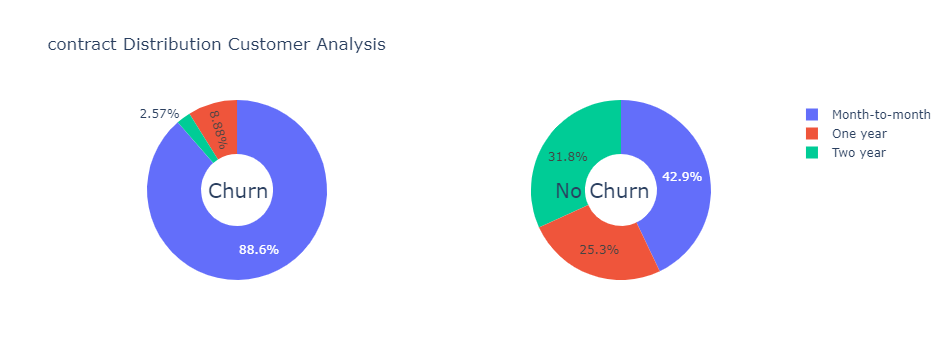

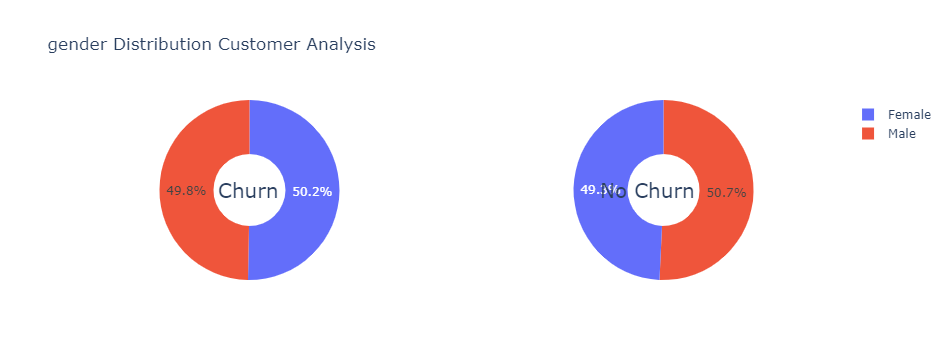

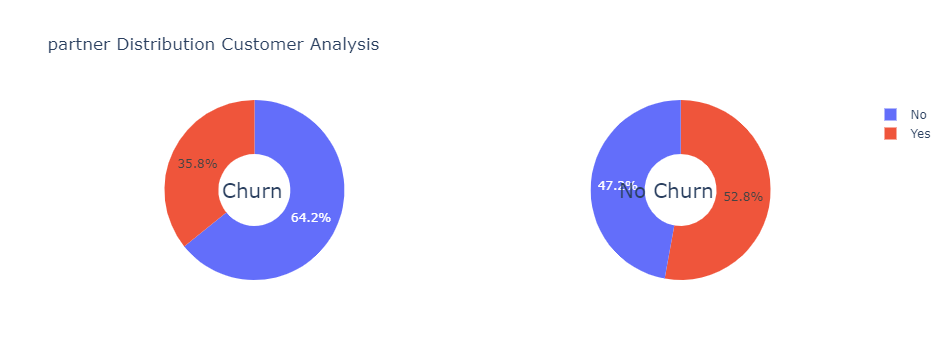

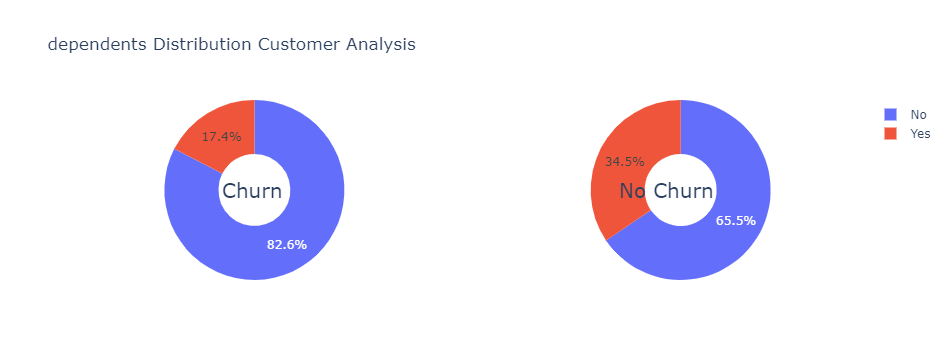

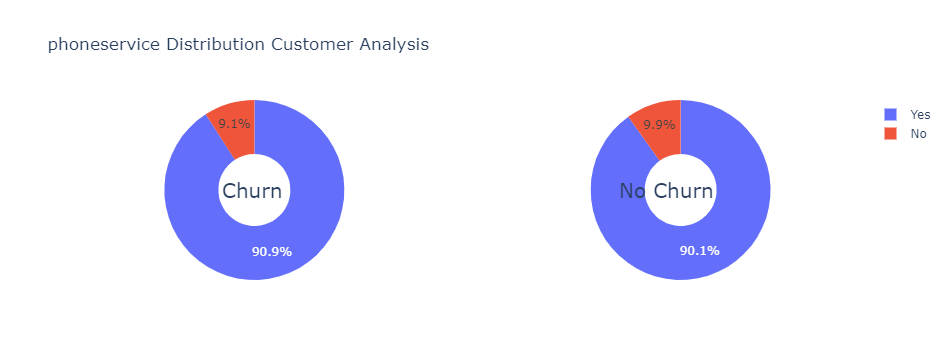

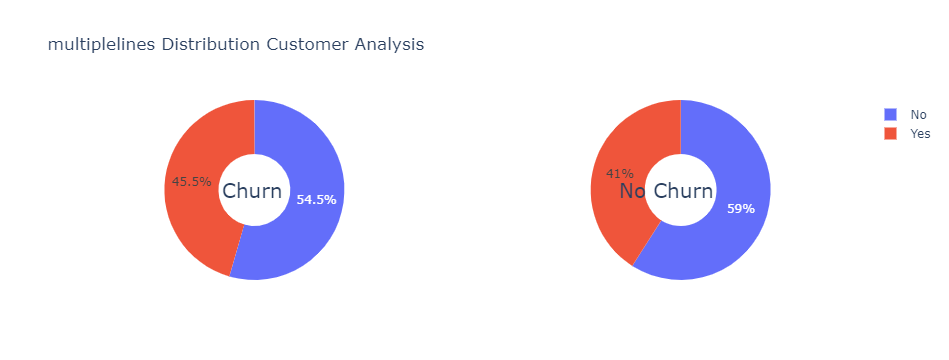

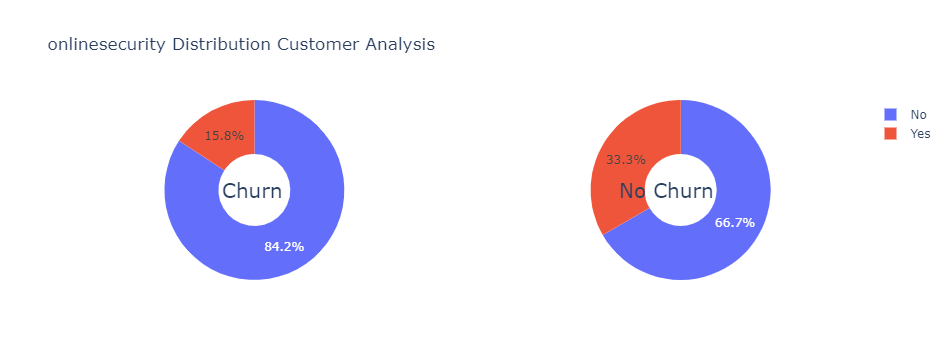

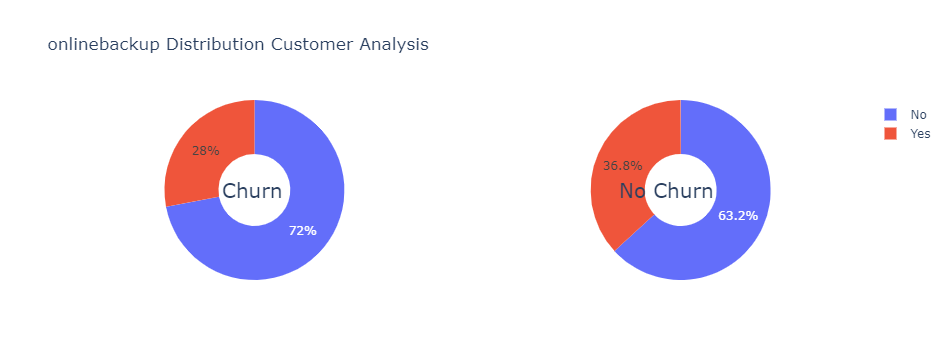

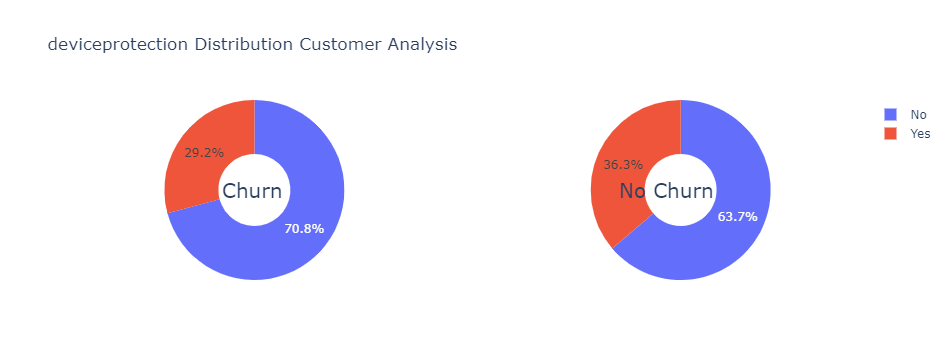

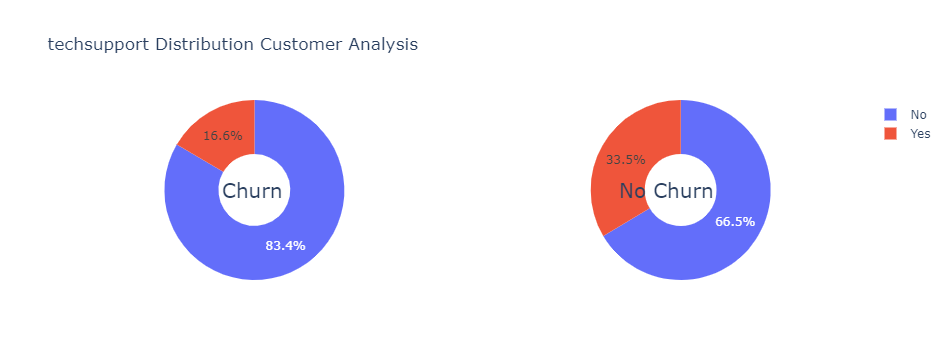

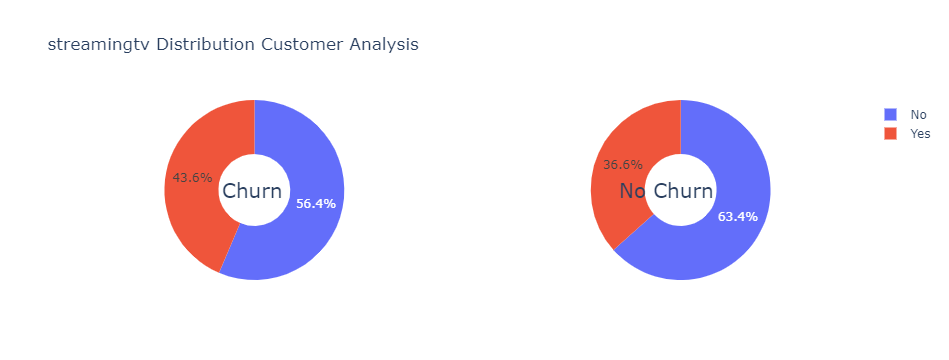

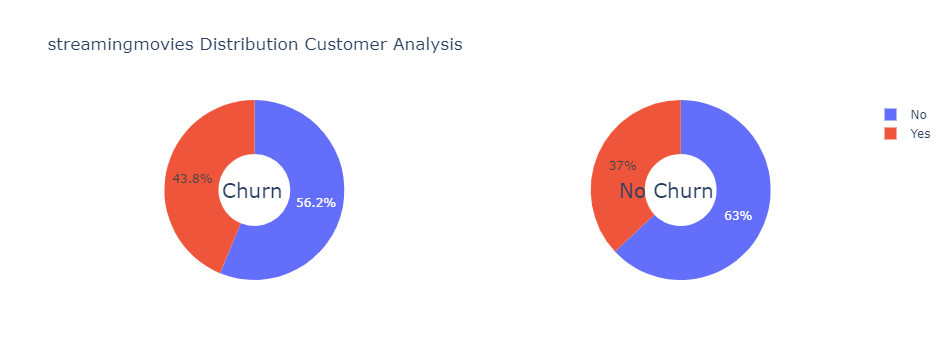

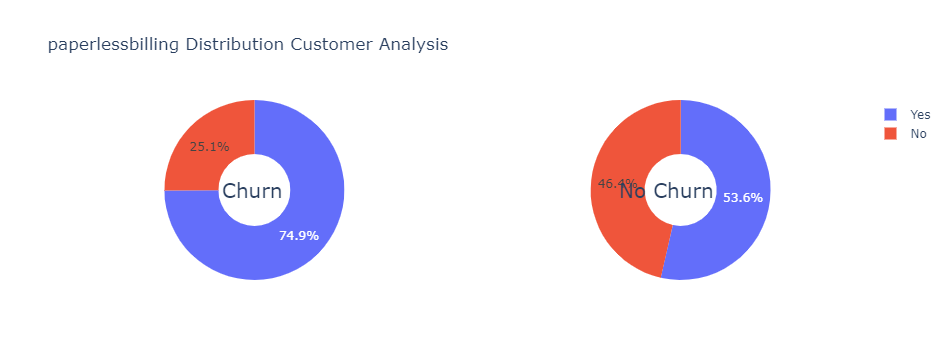

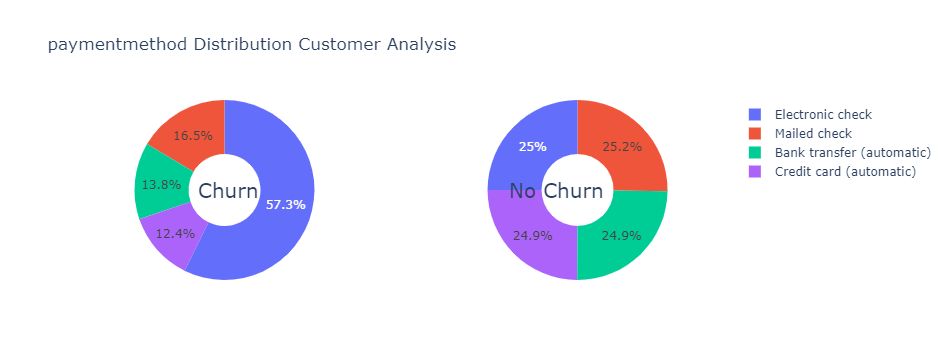

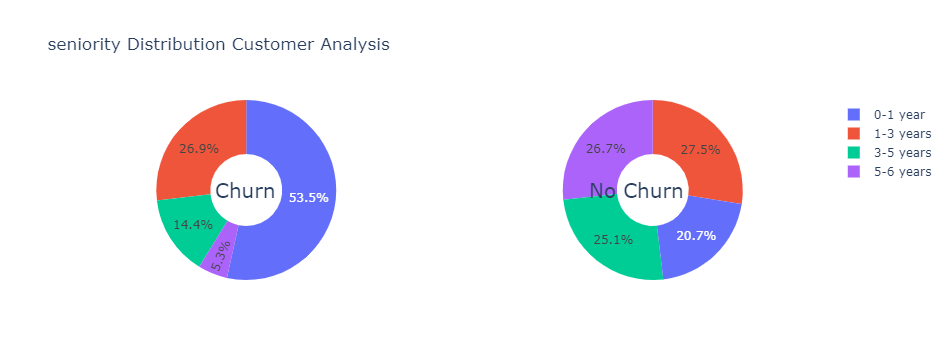

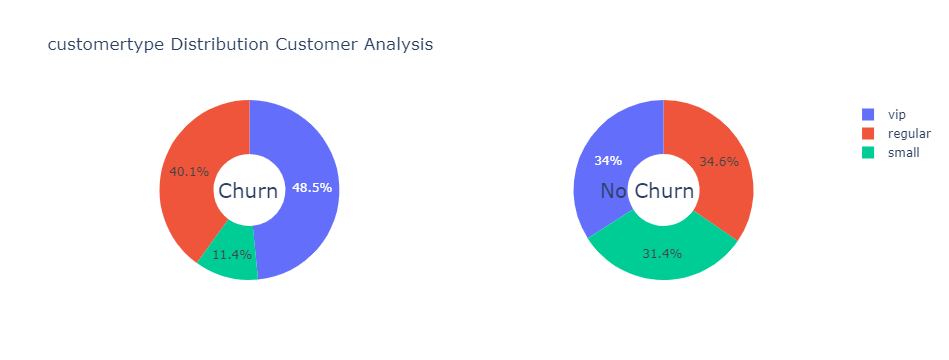

In [42]:
category_columns = ["contract", "gender", "partner", "dependents", "phoneservice", "multiplelines", "onlinesecurity","onlinebackup",
                    "deviceprotection","techsupport","streamingtv", "streamingmovies" , "paperlessbilling", "paymentmethod", "seniority","customertype"]

# for all categorical columns plot pie and distribution    
for col in category_columns:
    distribution_pie_plot(data, col)

##### We can see in the last visualization that Small customers have a tendency to stay in the company 

In [43]:
churn['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

##### We have almost 80% from all customers that using our 'internet services' (5517 customers)

In [44]:
churn.groupby('internetservice').agg({'churn':['count','sum','mean']})

churn                
                count   sum      mean
internetservice                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

<AxesSubplot:xlabel='internetservice'>

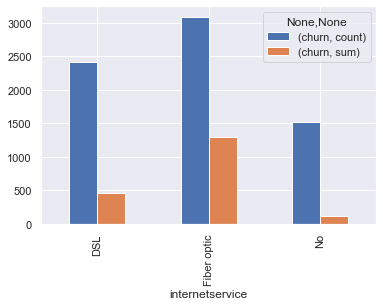

In [45]:
churn.groupby('internetservice').agg({'churn':['count','sum']}).plot(kind='bar', legend=True)

##### We see here that as long as the customer dont have internet services the chances he will stay high.</br>
##### Also we see that customers who have 'fiber optic' are at high risk to churn.

In [46]:
# Lets remove some columns that we don't need anymore
churn = churn.drop(['customerid','tenure'], axis=1)

In [47]:
churn

gender  seniorcitizen partner dependents phoneservice multiplelines  \
0     Female              0     Yes         No           No            No   
1       Male              0      No         No          Yes            No   
2       Male              0      No         No          Yes            No   
3       Male              0      No         No           No            No   
4     Female              0      No         No          Yes            No   
...      ...            ...     ...        ...          ...           ...   
7038    Male              0     Yes        Yes          Yes           Yes   
7039  Female              0     Yes        Yes          Yes           Yes   
7040  Female              0     Yes        Yes           No            No   
7041    Male              1     Yes         No          Yes           Yes   
7042    Male              0      No         No          Yes            No   

     internetservice onlinesecurity onlinebackup deviceprotection  ...  \
0                DSL             No          Yes               No  ...   
1                DSL            Yes           No              Yes  ...   
2                DSL            Yes          Yes               No  ...   
3                DSL            Yes           No              Yes  ...   
4        Fiber optic             No           No               No  ...   
...              ...            ...          ...              ...  ...   
7038             DSL            Yes           No              Yes  ...   
7039     Fiber optic             No          Yes              Yes  ...   
7040             DSL            Yes           No               No  ...   
7041     Fiber optic             No           No               No  ...   
7042     Fiber optic            Yes           No              Yes  ...   

     streamingtv streamingmovies        contract paperlessbilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  paymentmethod monthlycharges  totalcharges  churn  \
0              Electronic check          29.85         29.85      0   
1                  Mailed check          56.95       1889.50      0   
2                  Mailed check          53.85        108.15      1   
3     Bank transfer (automatic)          42.30       1840.75      0   
4              Electronic check          70.70        151.65      1   
...                         ...            ...           ...    ...   
7038               Mailed check          84.80       1990.50      0   
7039    Credit card (automatic)         103.20       7362.90      0   
7040           Electronic check          29.60        346.45      0   
7041               Mailed check          74.40        306.60      1   
7042  Bank transfer (automatic)         105.65       6844.50      0   

      customertype  seniority  
0            small   0-1 year  
1          regular  1-3 years  
2          regular   0-1 year  
3          regular  3-5 years  
4          regular   0-1 year  
...            ...        ...  
7038           vip  1-3 years  
7039           vip  5-6 years  
7040         small   0-1 year  
7041       regular   0-1 year  
7042           vip  5-6 years  

[7043 rows x 21 columns]

In [48]:
# we saw on our previous charts there some colums that dont effective to much our label data, so we remove them also
churn = churn.drop(['gender','seniorcitizen','multiplelines','deviceprotection','streamingtv','streamingmovies','phoneservice','partner','dependents','onlinebackup','onlinesecurity', 'techsupport'], axis=1)

In [49]:
churn = churn.reindex(sorted(churn.columns), axis=1)
churn

churn        contract customertype internetservice  monthlycharges  \
0         0  Month-to-month        small             DSL           29.85   
1         0        One year      regular             DSL           56.95   
2         1  Month-to-month      regular             DSL           53.85   
3         0        One year      regular             DSL           42.30   
4         1  Month-to-month      regular     Fiber optic           70.70   
...     ...             ...          ...             ...             ...   
7038      0        One year          vip             DSL           84.80   
7039      0        One year          vip     Fiber optic          103.20   
7040      0  Month-to-month        small             DSL           29.60   
7041      1  Month-to-month      regular     Fiber optic           74.40   
7042      0        Two year          vip     Fiber optic          105.65   

     paperlessbilling              paymentmethod  seniority  totalcharges  
0                 Yes           Electronic check   0-1 year         29.85  
1                  No               Mailed check  1-3 years       1889.50  
2                 Yes               Mailed check   0-1 year        108.15  
3                  No  Bank transfer (automatic)  3-5 years       1840.75  
4                 Yes           Electronic check   0-1 year        151.65  
...               ...                        ...        ...           ...  
7038              Yes               Mailed check  1-3 years       1990.50  
7039              Yes    Credit card (automatic)  5-6 years       7362.90  
7040              Yes           Electronic check   0-1 year        346.45  
7041              Yes               Mailed check   0-1 year        306.60  
7042              Yes  Bank transfer (automatic)  5-6 years       6844.50  

[7043 rows x 9 columns]

In [50]:
# Before we use get dummies function, lets save the original df in new df
churn_original = churn

In [51]:
# Now lets change all the categorical values to numric
churn = pd.get_dummies(churn)
churn.head(10)

churn  monthlycharges  totalcharges  contract_Month-to-month  \
0      0           29.85         29.85                        1   
1      0           56.95       1889.50                        0   
2      1           53.85        108.15                        1   
3      0           42.30       1840.75                        0   
4      1           70.70        151.65                        1   
5      1           99.65        820.50                        1   
6      0           89.10       1949.40                        1   
7      0           29.75        301.90                        1   
8      1          104.80       3046.05                        1   
9      0           56.15       3487.95                        0   

   contract_One year  contract_Two year  customertype_regular  \
0                  0                  0                     0   
1                  1                  0                     1   
2                  0                  0                     1   
3                  1                  0                     1   
4                  0                  0                     1   
5                  0                  0                     0   
6                  0                  0                     0   
7                  0                  0                     0   
8                  0                  0                     0   
9                  1                  0                     1   

   customertype_small  customertype_vip  internetservice_DSL  ...  \
0                   1                 0                    1  ...   
1                   0                 0                    1  ...   
2                   0                 0                    1  ...   
3                   0                 0                    1  ...   
4                   0                 0                    0  ...   
5                   0                 1                    0  ...   
6                   0                 1                    0  ...   
7                   1                 0                    1  ...   
8                   0                 1                    0  ...   
9                   0                 0                    1  ...   

   paperlessbilling_No  paperlessbilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   
3                    1                     0   
4                    0                     1   
5                    0                     1   
6                    0                     1   
7                    1                     0   
8                    0                     1   
9                    1                     0   

   paymentmethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        1   

   paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   
5                                      0                               1   
6                                      1                               0   
7                                      0                               0   
8                                      0                             

In [52]:
# check if all the dtypes changed to numeric
churn.dtypes

churn                                        int64
monthlycharges                             float64
totalcharges                               float64
contract_Month-to-month                      uint8
contract_One year                            uint8
contract_Two year                            uint8
customertype_regular                         uint8
customertype_small                           uint8
customertype_vip                             uint8
internetservice_DSL                          uint8
internetservice_Fiber optic                  uint8
internetservice_No                           uint8
paperlessbilling_No                          uint8
paperlessbilling_Yes                         uint8
paymentmethod_Bank transfer (automatic)      uint8
paymentmethod_Credit card (automatic)        uint8
paymentmethod_Electronic check               uint8
paymentmethod_Mailed check                   uint8
seniority_0-1 year                           uint8
seniority_1-3 years            

In [53]:
# Lets see again that we dont have null
churn.loc[churn.totalcharges.isnull()]

Empty DataFrame
Columns: [churn, monthlycharges, totalcharges, contract_Month-to-month, contract_One year, contract_Two year, customertype_regular, customertype_small, customertype_vip, internetservice_DSL, internetservice_Fiber optic, internetservice_No, paperlessbilling_No, paperlessbilling_Yes, paymentmethod_Bank transfer (automatic), paymentmethod_Credit card (automatic), paymentmethod_Electronic check, paymentmethod_Mailed check, seniority_0-1 year, seniority_1-3 years, seniority_3-5 years, seniority_5-6 years]
Index: []

[0 rows x 22 columns]

# EDA: Interesting relationships & correlations

In [54]:
churn.describe()

churn  monthlycharges  totalcharges  contract_Month-to-month  \
count  7043.000000     7043.000000   7043.000000              7043.000000   
mean      0.265370       64.761692   2279.734304                 0.550192   
std       0.441561       30.090047   2266.794470                 0.497510   
min       0.000000       18.250000      0.000000                 0.000000   
25%       0.000000       35.500000    398.550000                 0.000000   
50%       0.000000       70.350000   1394.550000                 1.000000   
75%       1.000000       89.850000   3786.600000                 1.000000   
max       1.000000      118.750000   8684.800000                 1.000000   

       contract_One year  contract_Two year  customertype_regular  \
count        7043.000000        7043.000000            7043.00000   
mean            0.209144           0.240664               0.36050   
std             0.406726           0.427517               0.48018   
min             0.000000           0.000000               0.00000   
25%             0.000000           0.000000               0.00000   
50%             0.000000           0.000000               0.00000   
75%             0.000000           0.000000               1.00000   
max             1.000000           1.000000               1.00000   

       customertype_small  customertype_vip  internetservice_DSL  ...  \
count         7043.000000       7043.000000          7043.000000  ...   
mean             0.260968          0.378532             0.343746  ...   
std              0.439194          0.485056             0.474991  ...   
min              0.000000          0.000000             0.000000  ...   
25%              0.000000          0.000000             0.000000  ...   
50%              0.000000          0.000000             0.000000  ...   
75%              1.000000          1.000000             1.000000  ...   
max              1.000000          1.000000             1.000000  ...   

       paperlessbilling_No  paperlessbilling_Yes  \
count          7043.000000           7043.000000   
mean              0.407781              0.592219   
std               0.491457              0.491457   
min               0.000000              0.000000   
25%               0.000000              0.000000   
50%               0.000000              1.000000   
75%               1.000000              1.000000   
max               1.000000              1.000000   

       paymentmethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       paymentmethod_Mailed check  seniority_0-1 year  seniority_1-3 years  \
count                 7043.000000         7043.000000          7043.000000   
mean                     0.228880            0.293767             0.273037   
std                      0.420141            0.455519             0.445551   
min                      0.000000            0.000000             0.000000   
25%     

In [55]:
churn.corr()

churn  monthlycharges  \
churn                                    1.000000        0.193356   
monthlycharges                           0.193356        1.000000   
totalcharges                            -0.198324        0.651174   
contract_Month-to-month                  0.405103        0.060165   
contract_One year                       -0.177820        0.004904   
contract_Two year                       -0.302253       -0.074681   
customertype_regular                     0.050382       -0.046773   
customertype_small                      -0.200452       -0.827262   
customertype_vip                         0.131624        0.795348   
internetservice_DSL                     -0.124214       -0.160189   
internetservice_Fiber optic              0.308020        0.787066   
internetservice_No                      -0.227890       -0.763557   
paperlessbilling_No                     -0.191825       -0.352150   
paperlessbilling_Yes                     0.191825        0.352150   
paymentmethod_Bank transfer (automatic) -0.117937        0.042812   
paymentmethod_Credit card (automatic)   -0.134302        0.030550   
paymentmethod_Electronic check           0.301919        0.271625   
paymentmethod_Mailed check              -0.091683       -0.377437   
seniority_0-1 year                       0.317666       -0.186611   
seniority_1-3 years                     -0.005995       -0.039946   
seniority_3-5 years                     -0.113707        0.060421   
seniority_5-6 years                     -0.232317        0.190478   

                                         totalcharges  \
churn                                       -0.198324   
monthlycharges                               0.651174   
totalcharges                                 1.000000   
contract_Month-to-month                     -0.444255   
contract_One year                            0.170814   
contract_Two year                            0.354481   
customertype_regular                        -0.204488   
customertype_small                          -0.424121   
customertype_vip                             0.586453   
internetservice_DSL                         -0.052469   
internetservice_Fiber optic                  0.361655   
internetservice_No                          -0.375223   
paperlessbilling_No                         -0.158574   
paperlessbilling_Yes                         0.158574   
paymentmethod_Bank transfer (automatic)      0.185987   
paymentmethod_Credit card (automatic)        0.182915   
paymentmethod_Electronic check              -0.059246   
paymentmethod_Mailed check                  -0.295758   
seniority_0-1 year                          -0.576747   
seniority_1-3 years                         -0.226950   
seniority_3-5 years                          0.235150   
seniority_5-6 years                          0.652392   

                                         contract_Month-to-month  \
churn                                                   0.405103   
monthlycharges                                          0.060165   
totalcharges                                           -0.444255   
contract_Month-to-month                                 1.000000   
contract_One year                                      -0.568744   
contract_Two year                                      -0.622633   
customertype_regular                                    0.149239   
customertype_small                                     -0.161989   
customertype_vip                                       -0.001066   
internetservice_DSL                                    -0.065509   
internetservice_Fiber optic                             0.244164   
internetservice_No                                     -0.218639   
paperlessbilling_No                                    -0.169096   
paperlessbilling_Yes                                    0.169096   
paymentmethod_Bank transfer (automatic)                -0.179707   
paymentmethod_Credit card (automatic)                  -

In [56]:
churn = churn.drop(['monthlycharges','totalcharges','customertype_regular','customertype_vip','customertype_regular'], axis=1)

In [57]:
churn.columns

Index(['churn', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'customertype_small', 'internetservice_DSL',
       'internetservice_Fiber optic', 'internetservice_No',
       'paperlessbilling_No', 'paperlessbilling_Yes',
       'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'seniority_0-1 year', 'seniority_1-3 years', 'seniority_3-5 years',
       'seniority_5-6 years'],
      dtype='object')

In [58]:
churn.dtypes

churn                                      int64
contract_Month-to-month                    uint8
contract_One year                          uint8
contract_Two year                          uint8
customertype_small                         uint8
internetservice_DSL                        uint8
internetservice_Fiber optic                uint8
internetservice_No                         uint8
paperlessbilling_No                        uint8
paperlessbilling_Yes                       uint8
paymentmethod_Bank transfer (automatic)    uint8
paymentmethod_Credit card (automatic)      uint8
paymentmethod_Electronic check             uint8
paymentmethod_Mailed check                 uint8
seniority_0-1 year                         uint8
seniority_1-3 years                        uint8
seniority_3-5 years                        uint8
seniority_5-6 years                        uint8
dtype: object

<AxesSubplot:>

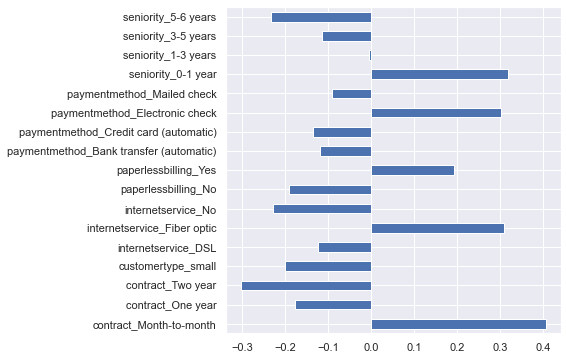

In [59]:
churn.corr()['churn'].drop('churn').plot(kind='barh',figsize=(6,6))

<AxesSubplot:>

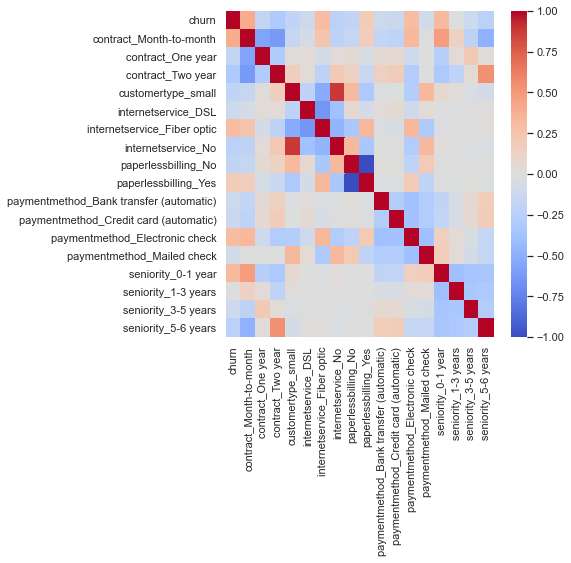

In [60]:
plt.figure(figsize=(6,6))
sns.heatmap(churn.corr(), annot=False, cmap="coolwarm")

#### We can see clearly that there are 4 factors (in bright color) that have the most impacpt to our label data:
#### First and most important is 'contact'. as long as the contract short time, the chances that the customer churn is high.
#### Second come's the 'seniority' that we've seen before the correlation. as long as the seniority low, the chances that the customer churn is high.
#### Third, 'internetservice'. as long as the customer dont have internet service his chances to stay high, on the other side, customers that has fiber optic service, are in high risk to churn
#### The last one, 'paymentmethod'. the most customers that churn, paid in Electronic check.

In [61]:
churn_by_contract = churn_original.groupby("contract")["churn"].sum()
churn_by_contract

contract
Month-to-month    1655
One year           166
Two year            48
Name: churn, dtype: int64

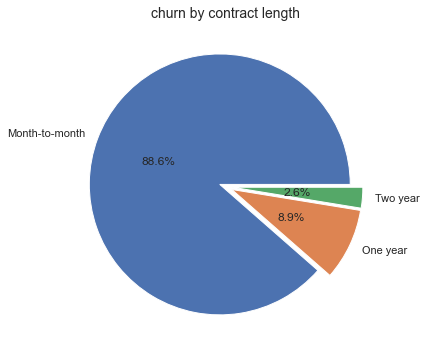

In [62]:
pie, ax = plt.subplots(figsize=[10,6])
labels = churn_by_contract.keys()
plt.pie(x=churn_by_contract, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("churn by contract length", fontsize=14);
pie.savefig("contractPieChart.png")

In [63]:
churn_by_pm = churn_original.groupby("paymentmethod")["churn"].sum()
churn_by_pm

paymentmethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: churn, dtype: int64

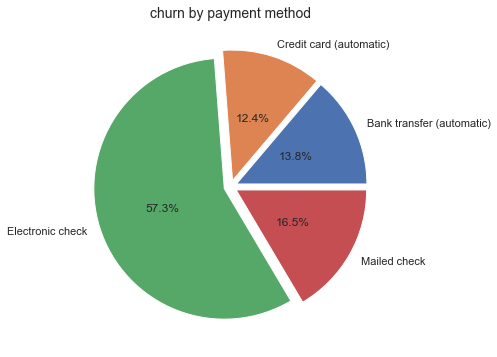

In [64]:
pie, ax = plt.subplots(figsize=[10,6])
labels = churn_by_pm.keys()
plt.pie(x=churn_by_pm, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("churn by payment method", fontsize=14);
pie.savefig("pmPieChart.png")

In [65]:
churn_by_internetservice = churn_original.groupby("internetservice")["churn"].sum()
churn_by_internetservice

internetservice
DSL             459
Fiber optic    1297
No              113
Name: churn, dtype: int64

In [66]:
churn_by_internetservice_per = churn_original.groupby('internetservice').agg(percentage =('churn', lambda p: p.sum() / churn_by_pm.sum() * 100)).round(2)
churn_by_internetservice_per

percentage
internetservice            
DSL                   24.56
Fiber optic           69.40
No                     6.05

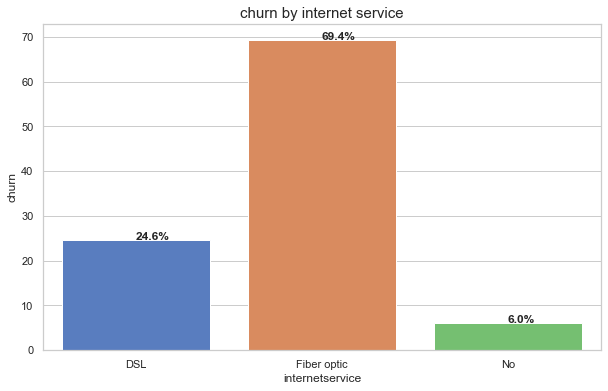

In [67]:
# Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=churn_by_internetservice_per.index, y='percentage', data=churn_by_internetservice_per, ci=None, palette="muted",orient='v', )

ax.set_title("churn by internet service", fontsize=15)
ax.set_xlabel ("internetservice")
ax.set_ylabel ("churn")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_internetservice_Chart.png");

##### We see here that as long as the customer dont have internet services the chances he will stay high.</br>
##### Also we see that customers who have 'fiber optic' are at high risk to churn.

In [68]:
churn_by_seniority = churn_original.groupby("seniority")["churn"].sum()
churn_by_seniority

seniority
0-1 year     999
1-3 years    502
3-5 years    269
5-6 years     99
Name: churn, dtype: int64

In [69]:
churn_by_seniority_per = churn_original.groupby('seniority').agg(percentage =('churn', lambda p: p.sum() / churn_by_pm.sum() * 100)).round(2)
churn_by_seniority_per

percentage
seniority            
0-1 year        53.45
1-3 years       26.86
3-5 years       14.39
5-6 years        5.30

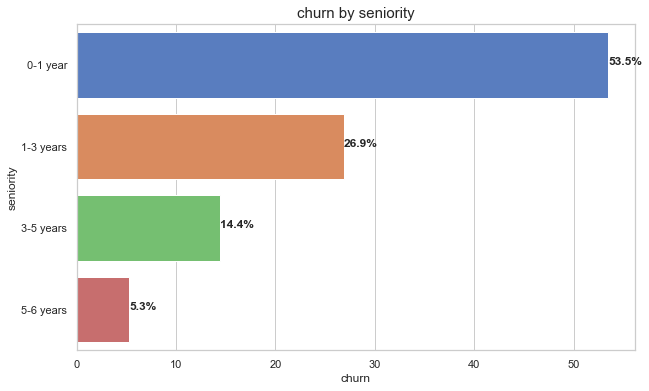

In [70]:
# Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="percentage", y=churn_by_seniority_per.index, data=churn_by_seniority_per ,ci=None, palette="muted",orient='h' )

ax.set_title("churn by seniority", fontsize=15)
ax.set_xlabel ("churn")
ax.set_ylabel ("seniority")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_seniority_Vertical.png");

<br>
<br>
<hr class="dotted">
<br>
<br>

# Step 3: Machine learning Algorithms

In [71]:
churn

churn  contract_Month-to-month  contract_One year  contract_Two year  \
0         0                        1                  0                  0   
1         0                        0                  1                  0   
2         1                        1                  0                  0   
3         0                        0                  1                  0   
4         1                        1                  0                  0   
...     ...                      ...                ...                ...   
7038      0                        0                  1                  0   
7039      0                        0                  1                  0   
7040      0                        1                  0                  0   
7041      1                        1                  0                  0   
7042      0                        0                  0                  1   

      customertype_small  internetservice_DSL  internetservice_Fiber optic  \
0                      1                    1                            0   
1                      0                    1                            0   
2                      0                    1                            0   
3                      0                    1                            0   
4                      0                    0                            1   
...                  ...                  ...                          ...   
7038                   0                    1                            0   
7039                   0                    0                            1   
7040                   1                    1                            0   
7041                   0                    0                            1   
7042                   0                    0                            1   

      internetservice_No  paperlessbilling_No  paperlessbilling_Yes  \
0                      0                    0                     1   
1                      0                    1                     0   
2                      0                    0                     1   
3                      0                    1                     0   
4                      0                    0                     1   
...                  ...                  ...                   ...   
7038                   0                    0                     1   
7039                   0                    0                     1   
7040                   0                    0                     1   
7041                   0                    0                     1   
7042                   0                    0                     1   

      paymentmethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041                                        0   
7042                                        1   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1               

In [72]:
# lest change type to float for apply ML algorithms
churn = churn.astype(float)

In [73]:
churn.dtypes

churn                                      float64
contract_Month-to-month                    float64
contract_One year                          float64
contract_Two year                          float64
customertype_small                         float64
internetservice_DSL                        float64
internetservice_Fiber optic                float64
internetservice_No                         float64
paperlessbilling_No                        float64
paperlessbilling_Yes                       float64
paymentmethod_Bank transfer (automatic)    float64
paymentmethod_Credit card (automatic)      float64
paymentmethod_Electronic check             float64
paymentmethod_Mailed check                 float64
seniority_0-1 year                         float64
seniority_1-3 years                        float64
seniority_3-5 years                        float64
seniority_5-6 years                        float64
dtype: object

In [74]:
churn.isna().sum()

churn                                      0
contract_Month-to-month                    0
contract_One year                          0
contract_Two year                          0
customertype_small                         0
internetservice_DSL                        0
internetservice_Fiber optic                0
internetservice_No                         0
paperlessbilling_No                        0
paperlessbilling_Yes                       0
paymentmethod_Bank transfer (automatic)    0
paymentmethod_Credit card (automatic)      0
paymentmethod_Electronic check             0
paymentmethod_Mailed check                 0
seniority_0-1 year                         0
seniority_1-3 years                        0
seniority_3-5 years                        0
seniority_5-6 years                        0
dtype: int64

In [75]:
churn

churn  contract_Month-to-month  contract_One year  contract_Two year  \
0       0.0                      1.0                0.0                0.0   
1       0.0                      0.0                1.0                0.0   
2       1.0                      1.0                0.0                0.0   
3       0.0                      0.0                1.0                0.0   
4       1.0                      1.0                0.0                0.0   
...     ...                      ...                ...                ...   
7038    0.0                      0.0                1.0                0.0   
7039    0.0                      0.0                1.0                0.0   
7040    0.0                      1.0                0.0                0.0   
7041    1.0                      1.0                0.0                0.0   
7042    0.0                      0.0                0.0                1.0   

      customertype_small  internetservice_DSL  internetservice_Fiber optic  \
0                    1.0                  1.0                          0.0   
1                    0.0                  1.0                          0.0   
2                    0.0                  1.0                          0.0   
3                    0.0                  1.0                          0.0   
4                    0.0                  0.0                          1.0   
...                  ...                  ...                          ...   
7038                 0.0                  1.0                          0.0   
7039                 0.0                  0.0                          1.0   
7040                 1.0                  1.0                          0.0   
7041                 0.0                  0.0                          1.0   
7042                 0.0                  0.0                          1.0   

      internetservice_No  paperlessbilling_No  paperlessbilling_Yes  \
0                    0.0                  0.0                   1.0   
1                    0.0                  1.0                   0.0   
2                    0.0                  0.0                   1.0   
3                    0.0                  1.0                   0.0   
4                    0.0                  0.0                   1.0   
...                  ...                  ...                   ...   
7038                 0.0                  0.0                   1.0   
7039                 0.0                  0.0                   1.0   
7040                 0.0                  0.0                   1.0   
7041                 0.0                  0.0                   1.0   
7042                 0.0                  0.0                   1.0   

      paymentmethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7038                                      0.0   
7039                                      0.0   
7040                                      0.0   
7041                                      0.0   
7042                                      1.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                       0.0                             1.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             1.0   
...                                     ...                             ...   
7038                                    0.0                             0.0   
7039                                    1.0               

#### We can see that we have 7042 rows, lets split them: 80% (5633 cases) will taken to train set, and the rest will be our test group (1409 cases).
#### In the test group our model predict if the customer churn. 
#### (because we already know the answer we can check if our model good by some measures like accuracy)

In [76]:
from sklearn.model_selection import train_test_split
test_size = 1409
train, test = train_test_split(churn, test_size=test_size, random_state=0, shuffle=True)
label = 'churn'
x_train = train.drop(label, axis=1)
y_train = train[label]
x_test, y_test = test.drop(label, axis=1), test[label]

In [77]:
train

churn  contract_Month-to-month  contract_One year  contract_Two year  \
2920    0.0                      0.0                0.0                1.0   
2966    0.0                      1.0                0.0                0.0   
6099    0.0                      0.0                0.0                1.0   
5482    1.0                      0.0                1.0                0.0   
2012    1.0                      1.0                0.0                0.0   
...     ...                      ...                ...                ...   
4931    0.0                      1.0                0.0                0.0   
3264    0.0                      1.0                0.0                0.0   
1653    0.0                      0.0                0.0                1.0   
2607    1.0                      1.0                0.0                0.0   
2732    0.0                      1.0                0.0                0.0   

      customertype_small  internetservice_DSL  internetservice_Fiber optic  \
2920                 0.0                  1.0                          0.0   
2966                 0.0                  1.0                          0.0   
6099                 1.0                  0.0                          0.0   
5482                 0.0                  1.0                          0.0   
2012                 0.0                  0.0                          1.0   
...                  ...                  ...                          ...   
4931                 0.0                  0.0                          1.0   
3264                 0.0                  0.0                          1.0   
1653                 1.0                  0.0                          0.0   
2607                 0.0                  0.0                          1.0   
2732                 1.0                  0.0                          0.0   

      internetservice_No  paperlessbilling_No  paperlessbilling_Yes  \
2920                 0.0                  1.0                   0.0   
2966                 0.0                  0.0                   1.0   
6099                 1.0                  1.0                   0.0   
5482                 0.0                  0.0                   1.0   
2012                 0.0                  0.0                   1.0   
...                  ...                  ...                   ...   
4931                 0.0                  0.0                   1.0   
3264                 0.0                  0.0                   1.0   
1653                 1.0                  1.0                   0.0   
2607                 0.0                  0.0                   1.0   
2732                 1.0                  1.0                   0.0   

      paymentmethod_Bank transfer (automatic)  \
2920                                      0.0   
2966                                      0.0   
6099                                      1.0   
5482                                      0.0   
2012                                      0.0   
...                                       ...   
4931                                      0.0   
3264                                      0.0   
1653                                      0.0   
2607                                      0.0   
2732                                      0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
2920                                    0.0                             0.0   
2966                                    0.0                             1.0   
6099                                    0.0                             0.0   
5482                                    0.0                             0.0   
2012                                    0.0                             1.0   
...                                     ...                             ...   
4931                                    0.0                             1.0   
3264                                    0.0               

In [78]:
test

churn  contract_Month-to-month  contract_One year  contract_Two year  \
2200    0.0                      0.0                1.0                0.0   
4627    0.0                      0.0                1.0                0.0   
3225    0.0                      1.0                0.0                0.0   
2828    0.0                      0.0                0.0                1.0   
3768    0.0                      1.0                0.0                0.0   
...     ...                      ...                ...                ...   
2631    1.0                      1.0                0.0                0.0   
5333    1.0                      1.0                0.0                0.0   
6972    1.0                      0.0                1.0                0.0   
4598    0.0                      1.0                0.0                0.0   
3065    0.0                      1.0                0.0                0.0   

      customertype_small  internetservice_DSL  internetservice_Fiber optic  \
2200                 0.0                  1.0                          0.0   
4627                 0.0                  0.0                          1.0   
3225                 0.0                  1.0                          0.0   
2828                 1.0                  0.0                          0.0   
3768                 0.0                  0.0                          1.0   
...                  ...                  ...                          ...   
2631                 0.0                  0.0                          1.0   
5333                 0.0                  0.0                          1.0   
6972                 0.0                  0.0                          1.0   
4598                 0.0                  1.0                          0.0   
3065                 0.0                  1.0                          0.0   

      internetservice_No  paperlessbilling_No  paperlessbilling_Yes  \
2200                 0.0                  1.0                   0.0   
4627                 0.0                  0.0                   1.0   
3225                 0.0                  0.0                   1.0   
2828                 1.0                  1.0                   0.0   
3768                 0.0                  0.0                   1.0   
...                  ...                  ...                   ...   
2631                 0.0                  0.0                   1.0   
5333                 0.0                  1.0                   0.0   
6972                 0.0                  0.0                   1.0   
4598                 0.0                  1.0                   0.0   
3065                 0.0                  0.0                   1.0   

      paymentmethod_Bank transfer (automatic)  \
2200                                      0.0   
4627                                      0.0   
3225                                      0.0   
2828                                      0.0   
3768                                      0.0   
...                                       ...   
2631                                      0.0   
5333                                      0.0   
6972                                      0.0   
4598                                      0.0   
3065                                      0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
2200                                    0.0                             1.0   
4627                                    1.0                             0.0   
3225                                    0.0                             1.0   
2828                                    0.0                             0.0   
3768                                    1.0                             0.0   
...                                     ...                             ...   
2631                                    0.0                             1.0   
5333                                    0.0               

In [79]:
# Show shape for: x_train, y_train, x_test, y_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5634, 17), (5634,), (1409, 17), (1409,))

In [80]:
x_train

contract_Month-to-month  contract_One year  contract_Two year  \
2920                      0.0                0.0                1.0   
2966                      1.0                0.0                0.0   
6099                      0.0                0.0                1.0   
5482                      0.0                1.0                0.0   
2012                      1.0                0.0                0.0   
...                       ...                ...                ...   
4931                      1.0                0.0                0.0   
3264                      1.0                0.0                0.0   
1653                      0.0                0.0                1.0   
2607                      1.0                0.0                0.0   
2732                      1.0                0.0                0.0   

      customertype_small  internetservice_DSL  internetservice_Fiber optic  \
2920                 0.0                  1.0                          0.0   
2966                 0.0                  1.0                          0.0   
6099                 1.0                  0.0                          0.0   
5482                 0.0                  1.0                          0.0   
2012                 0.0                  0.0                          1.0   
...                  ...                  ...                          ...   
4931                 0.0                  0.0                          1.0   
3264                 0.0                  0.0                          1.0   
1653                 1.0                  0.0                          0.0   
2607                 0.0                  0.0                          1.0   
2732                 1.0                  0.0                          0.0   

      internetservice_No  paperlessbilling_No  paperlessbilling_Yes  \
2920                 0.0                  1.0                   0.0   
2966                 0.0                  0.0                   1.0   
6099                 1.0                  1.0                   0.0   
5482                 0.0                  0.0                   1.0   
2012                 0.0                  0.0                   1.0   
...                  ...                  ...                   ...   
4931                 0.0                  0.0                   1.0   
3264                 0.0                  0.0                   1.0   
1653                 1.0                  1.0                   0.0   
2607                 0.0                  0.0                   1.0   
2732                 1.0                  1.0                   0.0   

      paymentmethod_Bank transfer (automatic)  \
2920                                      0.0   
2966                                      0.0   
6099                                      1.0   
5482                                      0.0   
2012                                      0.0   
...                                       ...   
4931                                      0.0   
3264                                      0.0   
1653                                      0.0   
2607                                      0.0   
2732                                      0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
2920                                    0.0                             0.0   
2966                                    0.0                             1.0   
6099                                    0.0                             0.0   
5482                                    0.0                             0.0   
2012                                    0.0                             1.0   
...                                     ...                             ...   
4931                                    0.0                             1.0   
3264                                    0.0                             1.0   
1653                                    0.0                    

In [81]:
y_train

2920    0.0
2966    0.0
6099    0.0
5482    1.0
2012    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5634, dtype: float64

In [82]:
x_test

contract_Month-to-month  contract_One year  contract_Two year  \
2200                      0.0                1.0                0.0   
4627                      0.0                1.0                0.0   
3225                      1.0                0.0                0.0   
2828                      0.0                0.0                1.0   
3768                      1.0                0.0                0.0   
...                       ...                ...                ...   
2631                      1.0                0.0                0.0   
5333                      1.0                0.0                0.0   
6972                      0.0                1.0                0.0   
4598                      1.0                0.0                0.0   
3065                      1.0                0.0                0.0   

      customertype_small  internetservice_DSL  internetservice_Fiber optic  \
2200                 0.0                  1.0                          0.0   
4627                 0.0                  0.0                          1.0   
3225                 0.0                  1.0                          0.0   
2828                 1.0                  0.0                          0.0   
3768                 0.0                  0.0                          1.0   
...                  ...                  ...                          ...   
2631                 0.0                  0.0                          1.0   
5333                 0.0                  0.0                          1.0   
6972                 0.0                  0.0                          1.0   
4598                 0.0                  1.0                          0.0   
3065                 0.0                  1.0                          0.0   

      internetservice_No  paperlessbilling_No  paperlessbilling_Yes  \
2200                 0.0                  1.0                   0.0   
4627                 0.0                  0.0                   1.0   
3225                 0.0                  0.0                   1.0   
2828                 1.0                  1.0                   0.0   
3768                 0.0                  0.0                   1.0   
...                  ...                  ...                   ...   
2631                 0.0                  0.0                   1.0   
5333                 0.0                  1.0                   0.0   
6972                 0.0                  0.0                   1.0   
4598                 0.0                  1.0                   0.0   
3065                 0.0                  0.0                   1.0   

      paymentmethod_Bank transfer (automatic)  \
2200                                      0.0   
4627                                      0.0   
3225                                      0.0   
2828                                      0.0   
3768                                      0.0   
...                                       ...   
2631                                      0.0   
5333                                      0.0   
6972                                      0.0   
4598                                      0.0   
3065                                      0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
2200                                    0.0                             1.0   
4627                                    1.0                             0.0   
3225                                    0.0                             1.0   
2828                                    0.0                             0.0   
3768                                    1.0                             0.0   
...                                     ...                             ...   
2631                                    0.0                             1.0   
5333                                    0.0                             1.0   
6972                                    0.0                    

In [83]:
y_test

2200    0.0
4627    0.0
3225    0.0
2828    0.0
3768    0.0
       ... 
2631    1.0
5333    1.0
6972    1.0
4598    0.0
3065    0.0
Name: churn, Length: 1409, dtype: float64

# Decision Tree

### Lets try some options

In [84]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

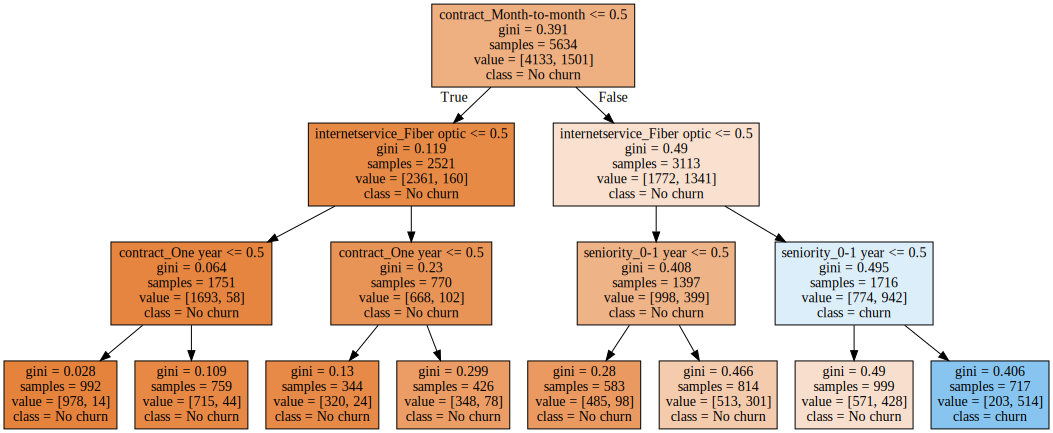

In [85]:
# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

# Using the function above, with the 3 arg
    # tree
    # feaures
    # labels --> we'll go over the example and it will be clear
plot_tree(clf, x_train.columns, ['No churn', 'churn'])


In [86]:
# Evaluation for Decision Tree
accuracy_score(y_test, y_test_pred_DecisionTree)

0.7735982966643009

In [87]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=5)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

In [88]:
# Evaluation for Decision Tree
accuracy_score(y_test, y_test_pred_DecisionTree)

0.7785663591199432

In [89]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=9)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

In [90]:
# Evaluation for Decision Tree
# This is the best prediction we have got
accuracy_score(y_test, y_test_pred_DecisionTree)

0.7913413768630234

# Random Forest

### Lets try some options

In [91]:
from sklearn.ensemble import RandomForestClassifier

# define the algorithm:
    # arg:
        # n_estimators = 100
        # max_dept = 3
        # random_state = 1
        
model = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=1)            
            
# running\training the algorithm with the train data

model.fit(x_train, y_train)

# making a prediction based on "test" data features

y_test_pred_RandomForest = model.predict(x_test)

# saving results to DataFrame

output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})

# saving results to csv
output.to_csv('my_RandomForest_Prediction.csv', index=False)

In [92]:
# Evaluation for Random Forest
accuracy_score(y_test, y_test_pred_RandomForest)

0.7714691270404542

In [93]:
from sklearn.ensemble import RandomForestClassifier

# define the algorithm:
    # arg:
        # n_estimators = 100
        # max_dept = 11
        # random_state = 1
        
model = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)            
            
# running\training the algorithm with the train data

model.fit(x_train, y_train)

# making a prediction based on "test" data features

y_test_pred_RandomForest = model.predict(x_test)

# saving results to DataFrame

output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})

# saving results to csv
output.to_csv('my_RandomForest_Prediction.csv', index=False)

In [94]:
# Evaluation for Random Forest
# This is the best prediction we have got
accuracy_score(y_test, y_test_pred_RandomForest)

0.7920511000709723

In [95]:
from sklearn.ensemble import RandomForestClassifier

# define the algorithm:
    # arg:
        # n_estimators = 115
        # max_dept = 7
        # random_state = 1
        
model = RandomForestClassifier(n_estimators=115, max_depth=7, random_state=1)            
            
# running\training the algorithm with the train data

model.fit(x_train, y_train)

# making a prediction based on "test" data features

y_test_pred_RandomForest = model.predict(x_test)

# saving results to DataFrame

output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})

# saving results to csv
output.to_csv('my_RandomForest_Prediction.csv', index=False)

In [96]:
# Evaluation for Random Forest
accuracy_score(y_test, y_test_pred_RandomForest)

0.7906316536550745

In [97]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.24552527, 0.03772926, 0.07496496, 0.02521982, 0.02876989,
       0.152406  , 0.03537364, 0.01863013, 0.01762223, 0.00994652,
       0.00878993, 0.08270294, 0.00890724, 0.18359141, 0.01883557,
       0.01558007, 0.03540511])

In [98]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

feature  importance
0                   contract_Month-to-month    0.245525
13                       seniority_0-1 year    0.183591
5               internetservice_Fiber optic    0.152406
11           paymentmethod_Electronic check    0.082703
2                         contract_Two year    0.074965
1                         contract_One year    0.037729
16                      seniority_5-6 years    0.035405
6                        internetservice_No    0.035374
4                       internetservice_DSL    0.028770
3                        customertype_small    0.025220
14                      seniority_1-3 years    0.018836
7                       paperlessbilling_No    0.018630
8                      paperlessbilling_Yes    0.017622
15                      seniority_3-5 years    0.015580
9   paymentmethod_Bank transfer (automatic)    0.009947
12               paymentmethod_Mailed check    0.008907
10    paymentmethod_Credit card (automatic)    0.008790

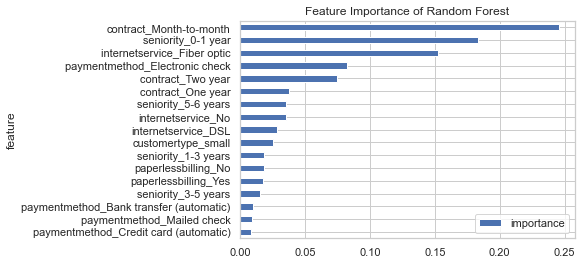

In [99]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

# KNN - K Nearest Neighbors

### Lets try some options

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# define the algorithm:
    # arg:
        # n_neighbors = 7
clf = KNeighborsClassifier(n_neighbors=7)
        
# running\training the algorithm with the train data

clf.fit(x_train, y_train)

# making a prediction based on "test" data features

y_test_pred_Knn = clf.predict(x_test)

# saving results to DataFrame
output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})

# saving results to csv
output.to_csv('my_Knn_Prediction.csv', index=False)

In [101]:
# Evaluation for Knn
accuracy_score(y_test, y_test_pred_Knn)

0.7629524485450674

In [102]:
from sklearn.neighbors import KNeighborsClassifier

# define the algorithm:
    # arg:
        # n_neighbors = 15
clf = KNeighborsClassifier(n_neighbors=15)
        
# running\training the algorithm with the train data

clf.fit(x_train, y_train)

# making a prediction based on "test" data features

y_test_pred_Knn = clf.predict(x_test)

# saving results to DataFrame
output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})

# saving results to csv
output.to_csv('my_Knn_Prediction.csv', index=False)

In [103]:
# Evaluation for Knn
accuracy_score(y_test, y_test_pred_Knn)

0.759403832505323

In [104]:
# Importing the algorithm
from sklearn.neighbors import KNeighborsClassifier

# define the algorithm:
    # arg:
        # n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors=120)
        
# running\training the algorithm with the train data

clf.fit(x_train, y_train)

# making a prediction based on "test" data features

y_test_pred_Knn = clf.predict(x_test)

# saving results to DataFrame
output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})

# saving results to csv
output.to_csv('my_Knn_Prediction.csv', index=False)

In [105]:
# Evaluation for Knn
# This is the best prediction we have got
accuracy_score(y_test, y_test_pred_Knn)

0.7934705464868701

In [106]:
tn,fp,fn,tp = confusion_matrix(y_test, y_test_pred_DecisionTree).ravel()
tn,fp,fn,tp

(952, 89, 205, 163)

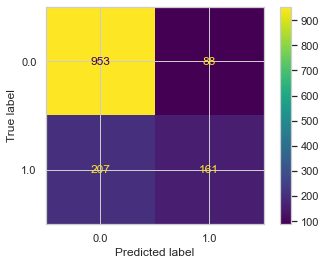

In [107]:
plot_confusion_matrix(model, x_test, y_test)  
plt.show()  

#### Lets create banchmark to evaluate the results of our models

#### We decided to set banchmark based on our seniority column.
#### We can see that most of our customers didn't left the company.

In [108]:
def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7388218594748048

#### knn accuracy_score: 0.794
#### DecisionTreeClassifier accuracy_score: 0.79134
#### Random Forest accuracy_score: 0.792
#### Benchmark accuracy_score: 0.738
#### As we can see the prediction chances in our various models were 6% higher then our benchmark, not so great but still good.


<br>
<br>
<hr class="dotted">
<br>
<br>